# Arthurs' Project

In [1]:
#### Import of visualisation modules ####

import pandas as pd
import seaborn as sns
import pylab
import matplotlib.pyplot as plt
import math
import numpy as np

#### Import of Machine learning modules ####
from sklearn.model_selection import train_test_split

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

In [2]:
#### Import of the data ####

data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')
data

#data.shape
#data.columns
data.head(8)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.0,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.0,0.0,0.0,Winter,No Holiday,Yes


## VISUALISATION

In [3]:
# Let's plot some graphs to take a global look on the data :

# Firstly we use simple graphs like scatter to visualize Rented Bike Count (our target)
# for different variables :

# below we created the list of the names of the external factors
dataWithoutRBC = list(data.columns)
dataWithoutRBC
del dataWithoutRBC[0] # we supress the date
del dataWithoutRBC[dataWithoutRBC.index('Rented Bike Count')] # we also supress the rented bike count

<Figure size 432x288 with 0 Axes>

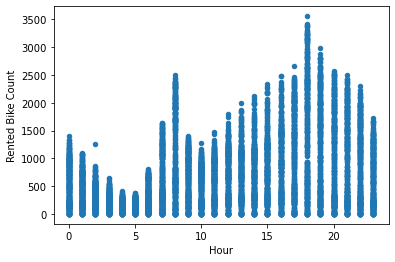

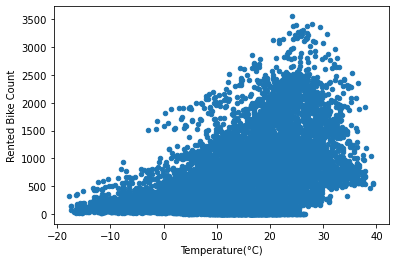

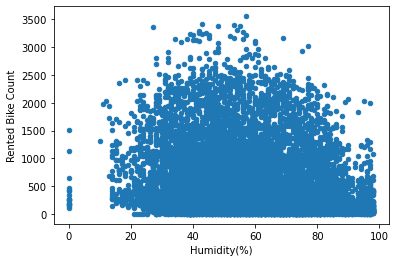

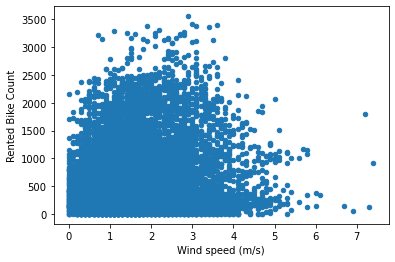

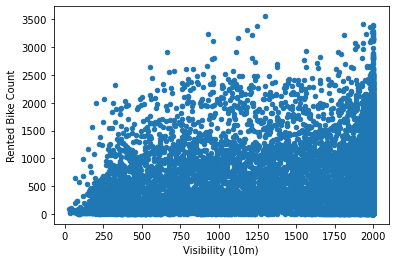

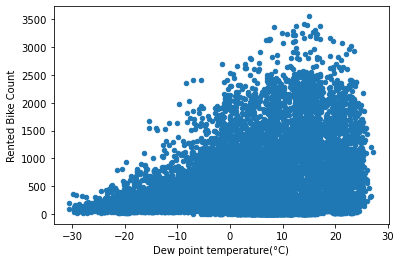

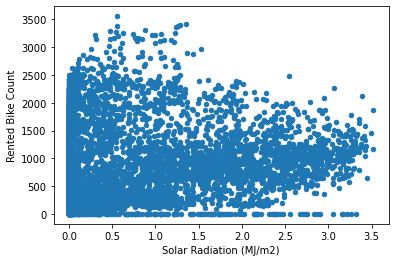

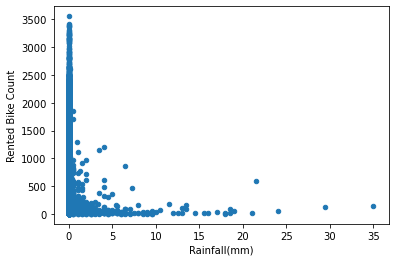

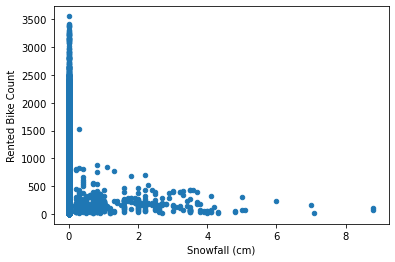

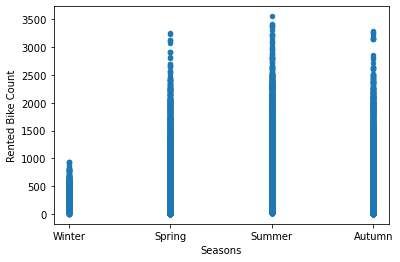

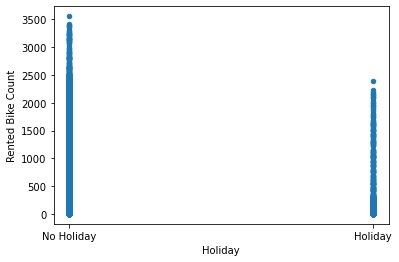

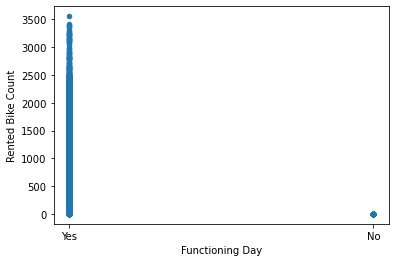

In [4]:
# This function will allow us to plot all the graphs in a row
def plotScatter(data):
    for i in range(len(dataWithoutRBC)):
        plt.figure(i+1)
        data.plot(y='Rented Bike Count' , x = dataWithoutRBC[i], kind = 'scatter')
plotScatter(data)

In [5]:
# Now let's use seaborn library :

# We create the list of variables without the date and qualitative values
varOnly = list(data.columns)
varOnly
del varOnly[0]
del varOnly[varOnly.index('Rented Bike Count')]
del varOnly[varOnly.index('Functioning Day')]
del varOnly[varOnly.index('Holiday')]
del varOnly[varOnly.index('Seasons')]

<Figure size 432x288 with 0 Axes>

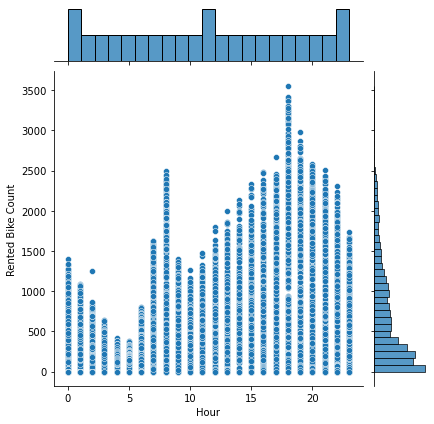

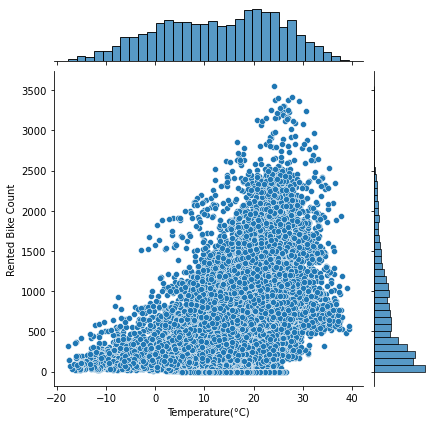

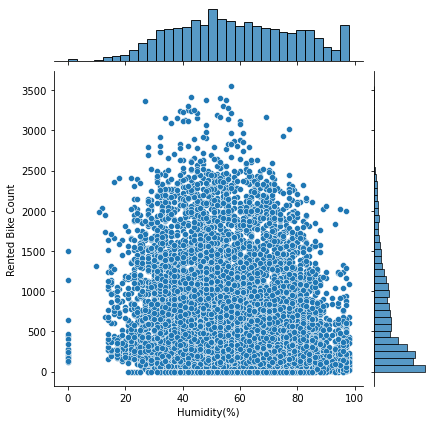

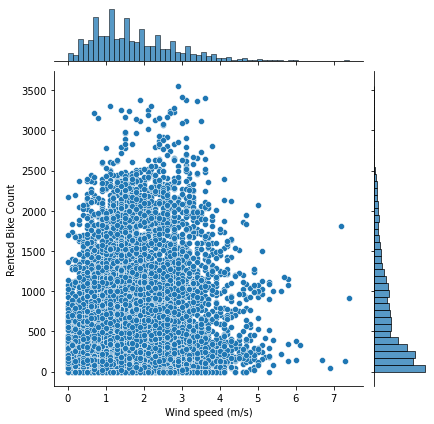

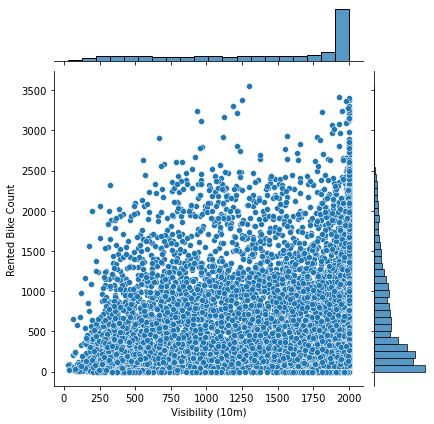

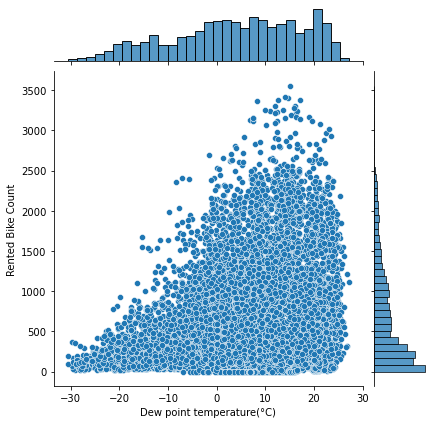

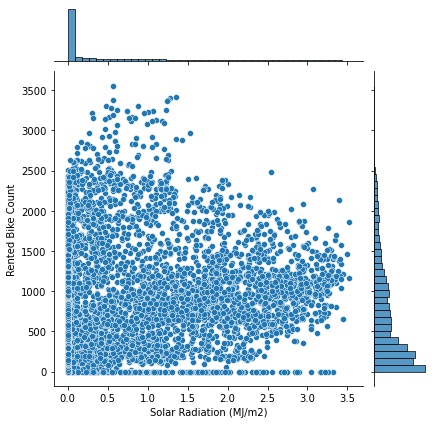

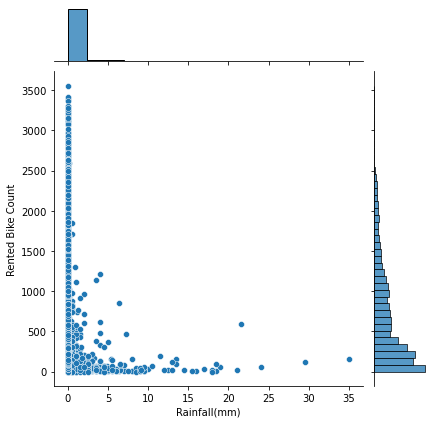

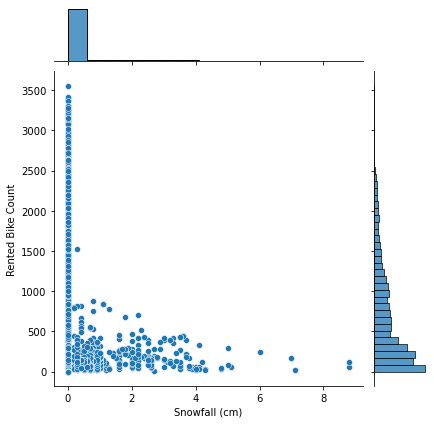

In [6]:
# We plot the jointplots of each variables to have an enhanced vizualisation of the 
# impact of each factor : 

def plotJoint(data):
    for i in range(len(varOnly)):
        plt.figure(i+1)
        sns.jointplot(y='Rented Bike Count',x=varOnly[i],data=data)
plotJoint(data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

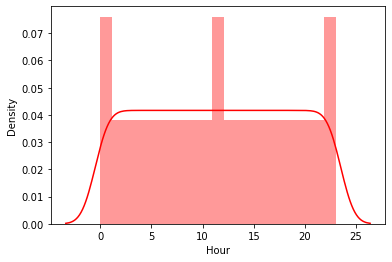

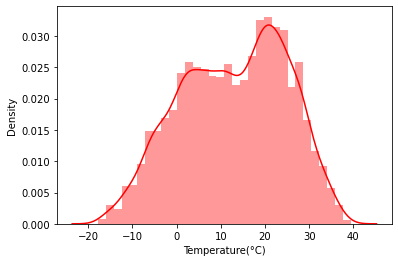

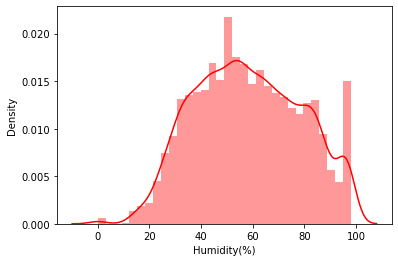

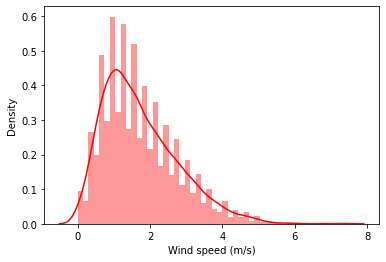

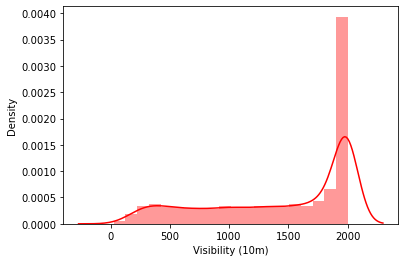

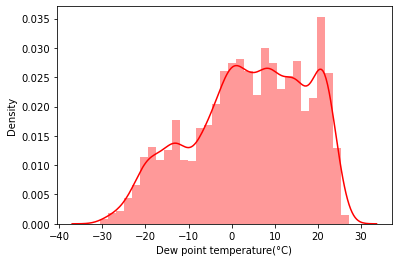

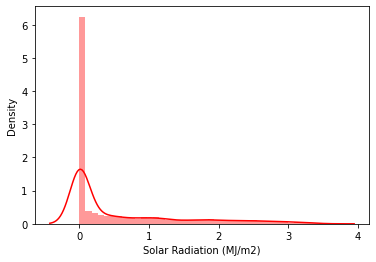

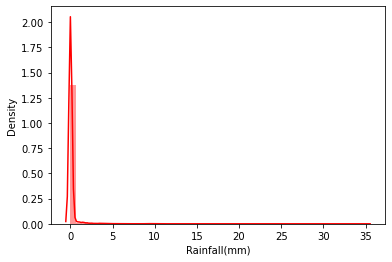

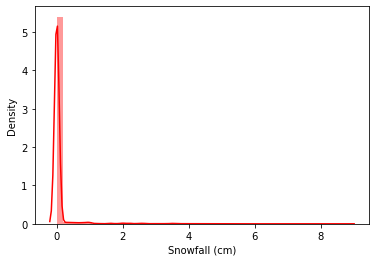

In [7]:
# Now we create a function to visualize the distribution of the various factors :

def plotDistrib(var):
    for i in range(len(var)):
        plt.figure(i+1)
        sns.distplot(data[var[i]], color = 'red')
plotDistrib(varOnly)

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

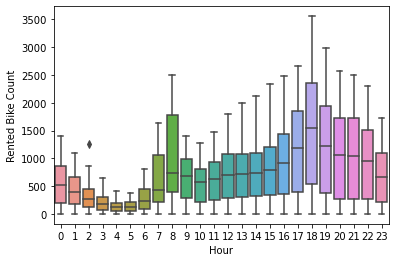

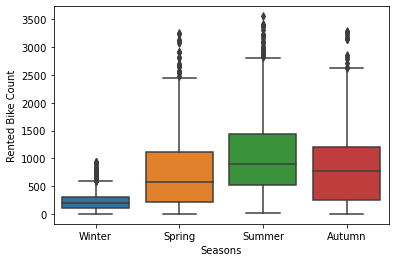

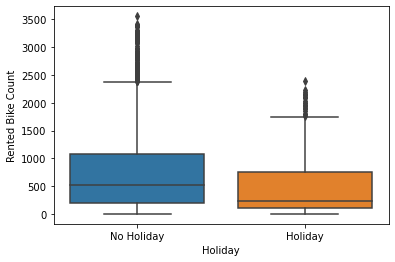

In [8]:
# We also plot boxplots for some factors

plt.figure(1)
sns.boxplot(x='Hour',y='Rented Bike Count',data=data)
plt.figure(2)
sns.boxplot(x='Seasons',y='Rented Bike Count',data=data)
plt.figure(3)
sns.boxplot(x='Holiday',y='Rented Bike Count',data=data)

Text(0.5, 1.0, 'Bike Data.corr()')

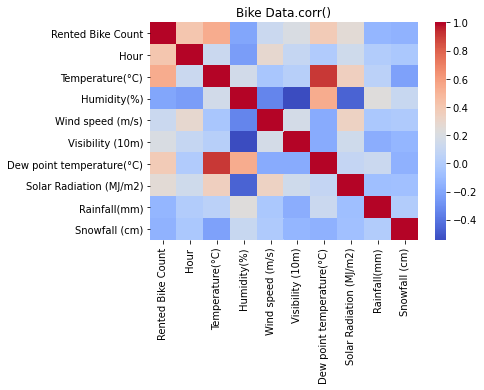

In [9]:
# Now we plot the heatmap, wich will help us to identify the most inluents factors

dt = data.corr()
sns.heatmap(dt,cmap='coolwarm')
plt.title('Bike Data.corr()')

## PREPARATION

In [10]:
# To see which columns contains Nan values
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Functioning Day,0,0.0
Holiday,0,0.0
Seasons,0,0.0
Snowfall (cm),0,0.0
Rainfall(mm),0,0.0
Solar Radiation (MJ/m2),0,0.0
Dew point temperature(°C),0,0.0
Visibility (10m),0,0.0
Wind speed (m/s),0,0.0
Humidity(%),0,0.0


In [11]:
data.head(8)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.0,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
# We copy the df
data_num = data.copy(deep=True)

In [13]:
# We see that the last 3 columns and the Date column are string values, we want numeric values so we convert into integer
# Ex : Spring => 1, Summer => 2, Autumn => 3, Winter => 4

# Seasons Column :
seasons = {"Spring": 1, "Summer": 2, "Autumn": 3, "Winter": 4}

data_num['Seasons'] = data_num['Seasons'].replace(seasons)
data_num.Seasons.head(15)

0     4
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    4
Name: Seasons, dtype: int64

In [14]:
# Holiday Column :
holiday = {"No Holiday": 0, "Holiday": 1}

data_num['Holiday'] = data_num['Holiday'].replace(holiday)
data_num.Holiday.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: Holiday, dtype: int64

In [15]:
# Functioning Day Column :
FDay = {"No": 0, "Yes": 1}

data_num['Functioning Day'] = data_num['Functioning Day'].replace(FDay)
data_num['Functioning Day'].head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
Name: Functioning Day, dtype: int64

In [16]:
# Date Column :
        
data_num['Date'] = data_num['Date'].replace("/" , "", regex=True)
data_num['Date'] = data_num['Date'].astype(int)
data_num['Date'].head(15)

0     1122017
1     1122017
2     1122017
3     1122017
4     1122017
5     1122017
6     1122017
7     1122017
8     1122017
9     1122017
10    1122017
11    1122017
12    1122017
13    1122017
14    1122017
Name: Date, dtype: int32

In [17]:
# Remove some columns
# We saw in the correlation matrix that some parameters were not revelant (in blue). They have a negative correlation score.
# Let's try to remove them
#data_num = data_num.drop(data_num.columns[[0]], axis=1)

#sns.heatmap(data_num.corr(),cmap='coolwarm')
#plt.title('Bike Data.corr()')


# Thus, the DataFrame data_num is completely numeric. We can now split it into two dataframes.
data_num.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1122017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1
1,1122017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1
2,1122017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1
3,1122017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1
4,1122017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1


In [18]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaled = scaler.fit_transform(data_num)

# Convert X back to a Pandas DataFrame, for convenience
data_scale = pd.DataFrame(rescaled, index=data_num.index, columns=data_num.columns)

data_scale.head(8)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0.003653,0.071429,0.000000,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,1.0,0.0,1.0
1,0.003653,0.057368,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,1.0,0.0,1.0
2,0.003653,0.048650,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,1.0,0.0,1.0
3,0.003653,0.030090,0.130435,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,1.0,0.0,1.0
4,0.003653,0.021935,0.173913,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,1.0,0.0,1.0
5,0.003653,0.028121,0.217391,0.199301,0.377551,0.202703,1.0,0.205882,0.0,0.0,0.0,1.0,0.0,1.0
6,0.003653,0.050900,0.260870,0.195804,0.357143,0.175676,1.0,0.192042,0.0,0.0,0.0,1.0,0.0,1.0
7,0.003653,0.129359,0.304348,0.181818,0.387755,0.121622,1.0,0.195502,0.0,0.0,0.0,1.0,0.0,1.0


In [19]:
#### Spliting ####

X = data_scale.drop("Rented Bike Count", axis=1)
y = data_scale["Rented Bike Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
579,0.800731,0.130435,0.270979,0.530612,0.459459,0.973137,0.342561,0.000000,0.0,0.0,1.000000,1.0,1.0
2182,0.000664,0.956522,0.248252,0.530612,0.500000,0.633553,0.321799,0.000000,0.0,0.0,0.000000,1.0,1.0
6336,0.699768,0.000000,0.750000,0.806122,0.067568,0.944754,0.894464,0.000000,0.0,0.0,0.333333,0.0,1.0
3011,0.133843,0.478261,0.435315,0.948980,0.351351,0.339584,0.633218,0.053977,0.0,0.0,0.000000,0.0,1.0
3479,0.764862,1.000000,0.479021,0.448980,0.094595,1.000000,0.494810,0.000000,0.0,0.0,0.000000,0.0,1.0


## TRAINING + TESTING

In [20]:
# Accuracy fonction

def rmse_r2score(y,ypred):
    return math.sqrt(mean_squared_error(y, ypred)), r2_score(y, ypred)

In [21]:
# Linear Regression

pred1 = LinearRegression().fit(X_train, y_train)
rmse_r2score(y_test,pred1.predict(X_test))

(0.1272835935163292, 0.5051936583195034)

In [22]:
# Random forest

rfr = RandomForestRegressor(random_state=9)
rfr.fit(X_train, y_train)
rmse_r2score(y_test, rfr.predict(X_test))

(0.0664464412004113, 0.8651553090377303)

In [23]:
# KNeighbors Regression

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
rmse_r2score(y_test, knr.predict(X_test)) 

(0.08579131934793559, 0.7752099444729045)

In [24]:
# Decision Tree

dtr = DecisionTreeRegressor() 
dtr.fit(X_train, y_train)
rmse_r2score(y_test, dtr.predict(X_test))

(0.09578563800508424, 0.7197851198060862)

Text(0.5, 1.0, 'Correlation between actual_y and predict_y')

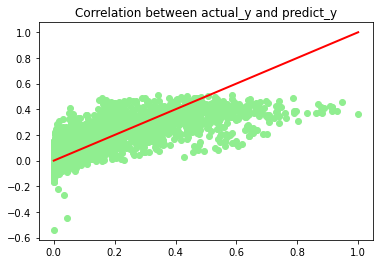

In [29]:
# Result plots with Linear regression
plt.scatter(y_test, pred1.predict(X_test), color='lightgreen')
plt.plot([0, 1], [0, 1], 'r-', lw=2) # Red straight line
plt.title('Correlation between actual_y and predict_y')

#pas beau

Text(0.5, 1.0, 'Correlation between actual_y and predict_y')

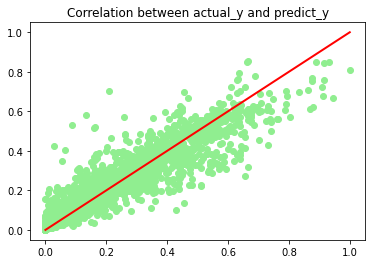

In [25]:
# Result plots with random forest
plt.scatter(y_test, rfr.predict(X_test), color='lightgreen')
plt.plot([0, 1], [0, 1], 'r-', lw=2) # Red straight line
plt.title('Correlation between actual_y and predict_y')

Text(0.5, 1.0, 'Correlation between actual_y and predict_y')

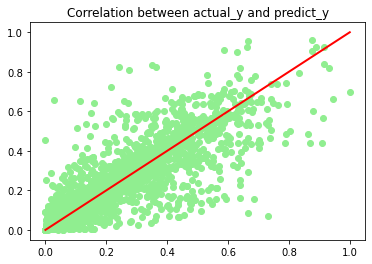

In [28]:
# Result plots with decision tree
plt.scatter(y_test, dtr.predict(X_test), color='lightgreen')
plt.plot([0, 1], [0, 1], 'r-', lw=2) # Red straight line
plt.title('Correlation between actual_y and predict_y')

In [27]:
"""# Hyper parameters

# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_search.fit(X_train, y_train)

rmse_r2score(y_test, grid_search.predict(X_test))"""

"# Hyper parameters\n\n# example of grid searching key hyperparametres for logistic regression\nfrom sklearn.datasets import make_blobs\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\n\n# define models and parameters\nmodel = LogisticRegression()\nsolvers = ['newton-cg', 'lbfgs', 'liblinear']\npenalty = ['l2']\nc_values = [100, 10, 1.0, 0.1, 0.01]\n\n# define grid search\ngrid = dict(solver=solvers,penalty=penalty,C=c_values)\n\ngrid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)\ngrid_search.fit(X_train, y_train)\n\nrmse_r2score(y_test, grid_search.predict(X_test))"